In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [143]:
df1=pd.read_csv('MoviesOnOTT.csv')
df1.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [144]:
df1.shape

(16744, 16)

In [145]:
#Dropping Column Type as it has not variance 
df1['Type'].value_counts()

0    16744
Name: Type, dtype: int64

In [146]:
df1.drop('Type',axis=1,inplace=True)

In [147]:
df1.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Directors', 'Genres', 'Country',
       'Language', 'Runtime'],
      dtype='object')

In [148]:
#Checking which columns have a lot of Nan values so that they can be dropped.
df1.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

##### Here the features Rotten Tomatoes and Age have 69.19% and 56.99% data missing respectively. Hence dropping them for better model accuracy. 

In [149]:
#Dropping columns 
df1.drop(['Rotten Tomatoes','Age'],axis=1,inplace=True)

In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           16744 non-null  int64  
 1   Title        16744 non-null  object 
 2   Year         16744 non-null  int64  
 3   IMDb         16173 non-null  float64
 4   Netflix      16744 non-null  float64
 5   Hulu         16744 non-null  int64  
 6   Prime Video  16744 non-null  int64  
 7   Disney+      16744 non-null  int64  
 8   Directors    16018 non-null  object 
 9   Genres       16469 non-null  object 
 10  Country      16309 non-null  object 
 11  Language     16145 non-null  object 
 12  Runtime      16152 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.7+ MB


In [151]:
#Checking the anomaly for Netflix values_counts
df1['Netflix'].value_counts()

0.00    13184
1.00     3559
1.01        1
Name: Netflix, dtype: int64

In [152]:
#Rectifying the anomaly by correcting the value 
df1['Netflix']=df1['Netflix'].replace({'1.01','1.00'})

In [153]:
#Rectifying the format for Netflix value
df1['Netflix']=df1['Netflix'].astype(int)

In [154]:
#Creating One column for all the OTT platforms 
df1['Netflix']=df1["Netflix"].replace({1:'Netflix'}).astype(str)
df1['Netflix']=df1['Netflix'].replace({0:np.nan})

df1['Disney+']=df1["Disney+"].replace({1:'Disney_Plus'}).astype(str)
df1['Disney+']=df1["Disney+"].replace({0:np.nan})

df1['Hulu']=df1["Hulu"].replace({1:'Hulu'}).astype(str)
df1['Hulu']=df1["Hulu"].replace({0:np.nan})

df1['Prime Video']=df1["Prime Video"].replace({1:'Prime_Video'}).astype(str)
df1['Prime Video']=df1["Prime Video"].replace({0:np.nan})

df1['OTT_Platform']=df1['Netflix'].str.cat(df1[['Disney+', 'Hulu','Prime Video']], sep=' ')#Creating the Column using the other Columns using a string concatenate

In [155]:
# Replacing the 0s to get just the names of the platforms.
a=[]
for i in df1['OTT_Platform'].values:
    a.append(i.replace('0','').strip().split())
    

In [156]:
df1.drop('OTT_Platform',axis=1,inplace=True)

In [157]:
#Assigning and creating the new OTT_Platform column
df1['OTT_Platform']=a

In [158]:
def clean2(x):
    return ','.join(x)

In [159]:
df1['OTT_Platform']=df1['OTT_Platform'].apply(clean2)

In [160]:
#Imputattion of missing values 

df1.isnull().sum()

ID                0
Title             0
Year              0
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
OTT_Platform      0
dtype: int64

#### IMDb

In [161]:
#ImDb imputation with median
df1['IMDb'].fillna(df1['IMDb'].median(),axis=0,inplace=True)

#### Genres 

In [162]:
df1['Genres'].fillna('Not-Mentioned',axis=0,inplace=True)

#### Runtime

In [163]:
df1['Runtime'].fillna(df1['Runtime'].median(),axis=0,inplace=True)

#### Language

In [164]:
df1['Language'].fillna('English',axis=0,inplace=True)

#### Directors

In [165]:
df1["Directors"].fillna(df1['Directors'].mode()[0],axis=0,inplace=True)

#### Country

In [166]:
df1["Country"].fillna(df1['Country'].mode()[0],axis=0,inplace=True)

### Business Insights 

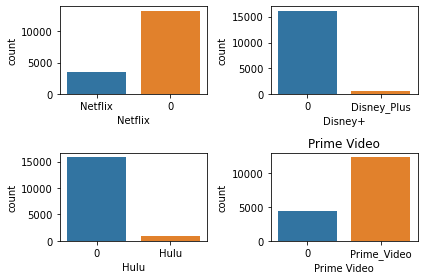

In [167]:
#Checking the number of shows on different types of OTT platforms 
figure, axes = plt.subplots(nrows=2, ncols=2)

plt.title('Netflix')
sns.countplot(df1['Netflix'],ax=axes[0,0])


plt.title('Disney+')
sns.countplot(df1['Disney+'],ax=axes[0,1])


plt.title('Hulu')
sns.countplot(df1['Hulu'],ax=axes[1,0])

plt.title('Prime Video')
sns.countplot(df1['Prime Video'],ax=axes[1,1])


plt.tight_layout()


##### As we can infer the maximum number of shows for the data is streamed on Prime Videos followed by Netflix

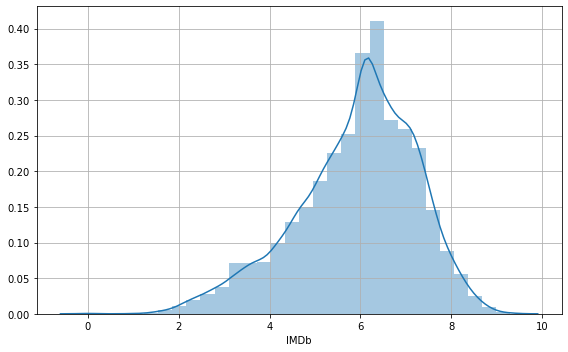

In [168]:
#Checking the Distribution of IMDb ratings 
plt.figure(figsize=(8,5))
sns.distplot(df1['IMDb'],bins=30)
plt.grid()
plt.tight_layout()

#### The distribution seems to follow a Gaussian Distribution with bit of left-skewed.


In [169]:
def ranged(i):
    if(i<=5):
        return '0-5'
    elif (i>5) and (i<=6):
        return '5-6'
    elif (i>6) and (i<=7):
        return '6-7'
    elif (i>7) and (i<=8):
        return '7-8'
    else:
        return '8-10'

In [170]:
#Creating and applying a Ranged IMDb to all the IMDb ratings 
df1['IMDb_ranged']=df1['IMDb'].apply(ranged)

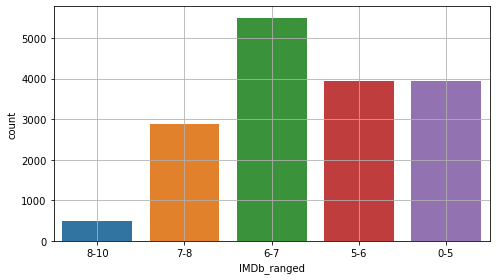

In [171]:
#Checking the balance in IMDb
plt.figure(figsize=(7,4))
sns.countplot(df1['IMDb_ranged'])
plt.grid()
plt.tight_layout()
plt.show()

In [172]:
#To get the top 10 Directors based on their IMDb ratings 
df1.groupby('Directors').agg({'IMDb':'mean','Title':'count'}).sort_values(by=['Title','IMDb'],ascending=False).head(10)

,IMDb,Title
Directors,,
Jay Chapman,6.072178,762
Joseph Kane,6.240000,30
Cheh Chang,6.757692,26
Sam Newfield,5.468182,22
Jim Wynorski,3.681818,22
William Beaudine,5.200000,21
David DeCoteau,3.195238,21
Jay Karas,6.565000,20
"Raúl Campos,Jan Suter",6.215000,20


## Genres
#### H0 : The Genres donot have a significance on the IMDb rating 
#### H1 : The Genres have a significance on the IMDb rating

In [173]:
mod=ols('IMDb~Genres',data=df1).fit()

In [174]:
aov=sm.stats.anova_lm(mod,type=2)

In [175]:
print(aov)

               df        sum_sq   mean_sq         F  PR(>F)
Genres     1909.0  10938.233404  5.729824  4.603434     0.0
Residual  14834.0  18463.652434  1.244685       NaN     NaN


#### We reject the Null Hypothesis that stated that Genres doesnot play any significance over IMDb rating 
#### Accepting H1: Genres has a significance over IMDb rating 

## Language
#### H0 : The Language does not have a significance on the IMDb rating 
#### H1 : The Language has a significance on the IMDb rating

In [176]:
mod1=ols('IMDb~Language',data=df1).fit()


In [177]:
aov1=sm.stats.anova_lm(mod1)

In [178]:
print(aov1)

               df        sum_sq   mean_sq         F        PR(>F)
Language   1101.0   2410.398393  2.189281  1.268723  1.066892e-08
Residual  15642.0  26991.487445  1.725578       NaN           NaN


#### We reject the Null Hypothesis that stated that Languages doesnot play any significance over IMDb rating 
#### Accepting H1: Languages has a significance over IMDb rating 

## Recommendation System

In [179]:
df1=df1.head(3000) #MemoryError due to Large dimension in the count_matrix during Cosine Similarity thus the data has been set to a subset

#### Cleaning the features which would be used for the recommendation engine and making them ready for sending them into a CountVectorizer

In [180]:
#Features are-
#Directors
#Genres
#Country
#Language
#IMDb
#Runtime

In [181]:
#Creating a function to clean all the features required for the recommendation
def clean(x,n):
    #converting strings to lower, replacing the space and splitting the elements with ','
    x=x.lower().replace(' ','').split(',')
    
    #Using a condition to take in maximum number of elements from each feature
    return x[:n] if(len(x)>=1) else x 

In [182]:
#Cleaned data and took 3 Director Names at max 

df1['Directors']=df1['Directors'].apply(lambda x:clean(x,3)) 

In [183]:
#Cleaned data and took 4 Genres at max 

df1['Genres']=df1['Genres'].apply(lambda x:clean(x,4))

In [184]:
#Cleaned data and took 4 Countries at max 

df1['Country']=df1['Country'].apply(lambda x:clean(x,4))

In [185]:
#Cleaned data and took 4 Languages at max 

df1['Language']=df1['Language'].apply(lambda x:clean(x,3))

In [186]:
#To scale the continuous variables used MinMaxScaling which will allow them to be in a range of 0-1 
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df1['IMDb1']=minmax.fit_transform(df1[['IMDb']])


In [187]:
#Converting the datatype of numerical features so that they can be added to the CountVectorizer
df1['IMDb1']=df1['IMDb1'].astype(str)

In [188]:
#Combining all the Features for the recommendation into a single column
def combined_features(x):
    return ' '.join(x['Directors'])+' '+' '.join(x['Genres'])+' '+' '.join(x['IMDb1']+' '+' '.join(x['Country'])+' '+' '.join(x['Language']))

In [189]:
df1['Combined_features']=df1.apply(combined_features,axis=1)

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(stop_words='english')

In [191]:
#Creating the CountVectorized Matrix which will be used for find the Cosine Similarities
count_matrix = count_vec.fit_transform(df1['Combined_features']) 

In [192]:
count_tokens=count_vec.get_feature_names()

In [193]:
count_matrix.shape 

(3000, 2762)

In [194]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [195]:
#cosine_sim[1]

In [196]:
indices=pd.Series(df1.index, index=df1['Title']) #Creating a series out of the Title and setting an index to them 

In [197]:
#indices

In [198]:
#Cleaning the Columns previously used to send in the Combined_Features
df1['Directors']=df1['Directors'].apply(clean2)

df1['Genres']=df1['Genres'].apply(clean2)

df1['Country']=df1['Country'].apply(clean2)

df1['Language']=df1['Language'].apply(clean2)

In [199]:
a=list(df1['Title'].unique()) #Created a List of the movie names to filter out Unknown Movie names provided. 

In [200]:
def get_recommendations(title, cosine_sim=cosine_sim,a=a):
    if title in a:
        #Creating a id for title 
        idx = indices[title]  
        
        # Getting the similarity scores mapped to indices using enumerate and creating a index value
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Sorting the similarity scores by reverse=True
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) 
        
        # Recommending the 8 movies excluding the one searched for 
        sim_scores = sim_scores[1:9] 
        
        #Looping through the list of similarity scores which are sorted and getting them in a variable 
        movie_indices = [i[0] for i in sim_scores]
        
        #Getting the Title , OTT_Platform and the IMDb rating of the movies which will be recommended
        return df1[['Title','OTT_Platform','IMDb']].iloc[movie_indices]
    else:
        
        #If the Movie Title searched for is not in the list of the Movie Titles passed in 'a'
        print('No Movies Found')

In [201]:
get_recommendations("Inception")

,Title,OTT_Platform,IMDb
246,The Wolf's Call,Netflix,6.9
900,The Core,"Netflix,Prime_Video",5.5
1004,Godzilla,Netflix,5.4
1806,The Humanity Bureau,Netflix,4.8
27,District 9,Netflix,7.9
136,Solo: A Star Wars Story,Netflix,6.9
412,Terminator Salvation,Netflix,6.5
463,2012,Netflix,5.8
